In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

In [2]:
df = pd.read_csv('D600 Task 2 Dataset 1 Housing Information.csv')

In [3]:
df.head()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


In [4]:
# Categorical Variables - Value Counts
print("Fireplace Counts:")
print(df['Fireplace'].value_counts())
print(df['Fireplace'].describe())

print("\nGarage Counts:")
print(df['Garage'].value_counts())
print(df['Garage'].describe())

Fireplace Counts:
Fireplace
No     5172
Yes    1828
Name: count, dtype: int64
count     7000
unique       2
top         No
freq      5172
Name: Fireplace, dtype: object

Garage Counts:
Garage
No     4488
Yes    2512
Name: count, dtype: int64
count     7000
unique       2
top         No
freq      4488
Name: Garage, dtype: object


In [5]:
#C1 - Identify the Dependent and Independent Variables

#Convert Fireplace and Garage from Yes No to 1s and 0s
label_encoder = LabelEncoder()
df['Fireplace'] = label_encoder.fit_transform(df['Fireplace'])
df['Garage'] = label_encoder.fit_transform(df['Garage'])

dependent_variable = 'IsLuxury'
independent_variables = ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 'RenovationQuality', 'Fireplace', 'Garage']

# Extract dependent and independent variables
dependent_data = df[dependent_variable]
independent_data = df[independent_variables]

selected_columns = [dependent_variable] + independent_variables
df_selected = df[selected_columns]

print(f"Dependent Variable: {dependent_variable}\nIndependent Variables: {independent_variables}")

Dependent Variable: IsLuxury
Independent Variables: ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 'RenovationQuality', 'Fireplace', 'Garage']


In [6]:
#C2 - Descriptive Statistics for Dependent and Independent Variables
df_selected.describe()

,IsLuxury,SquareFootage,NumBathrooms,NumBedrooms,RenovationQuality,Fireplace,Garage
count,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.50400,1048.947459,2.131397,3.008571,5.003357,0.261143,0.358857
std,0.50002,426.010482,0.952561,1.021940,1.970428,0.439289,0.479699
min,0.00000,550.000000,1.000000,1.000000,0.010000,0.000000,0.000000
25%,0.00000,660.815000,1.290539,2.000000,3.660000,0.000000,0.000000
50%,1.00000,996.320000,1.997774,3.000000,5.020000,0.000000,0.000000
75%,1.00000,1342.292500,2.763997,4.000000,6.350000,1.000000,1.000000
max,1.00000,2874.700000,5.807239,7.000000,10.000000,1.000000,1.000000


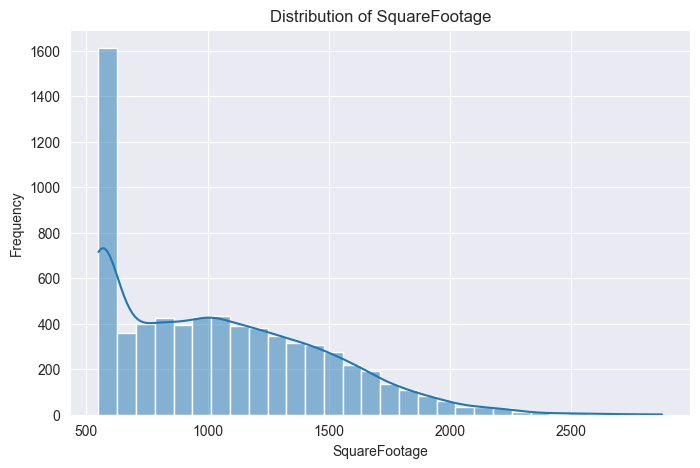

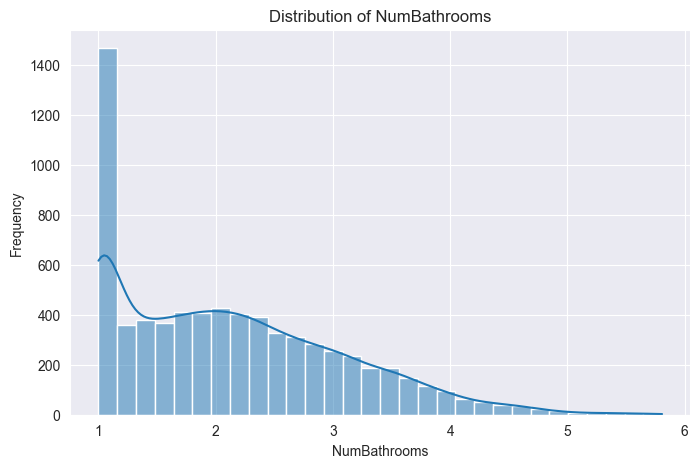

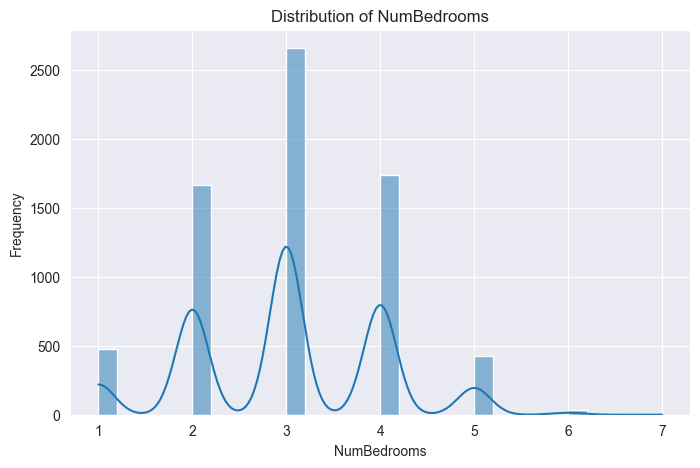

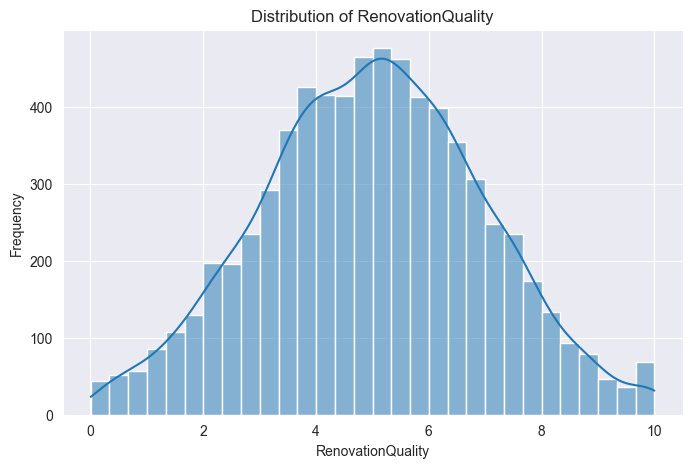

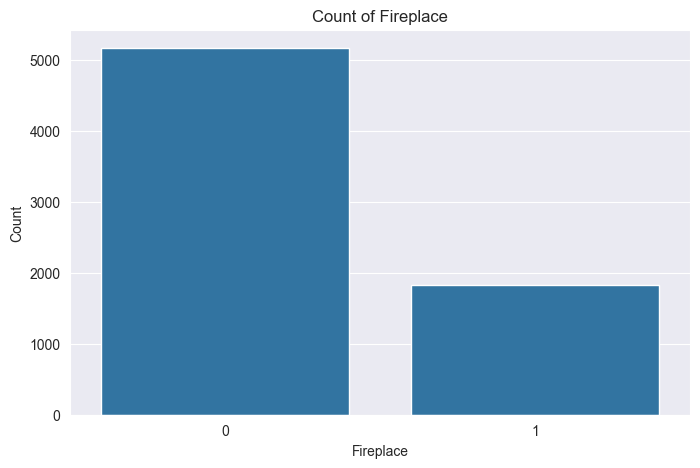

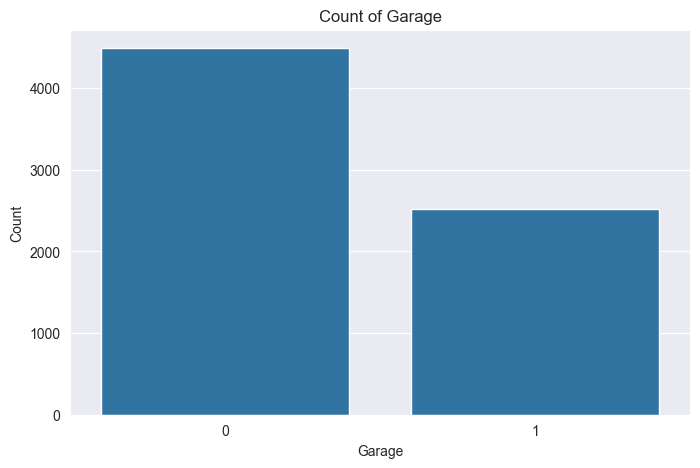

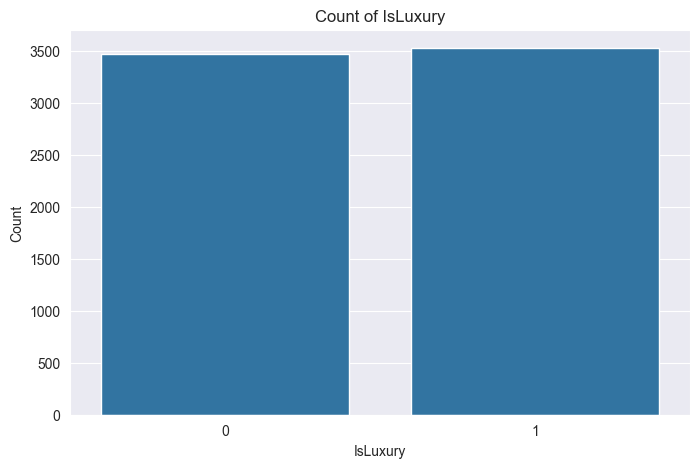

In [7]:
# C3 - Univariate Visualizations
continuous_vars = ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 'RenovationQuality']
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_selected, x=var, kde=True, bins=30)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

# Categorical Variables (Fireplace, Garage, IsLuxury)
categorical_vars = ['Fireplace', 'Garage', 'IsLuxury']
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_selected, x=var)
    plt.title(f"Count of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

In [ ]:
# C3 - Bivariate Visualizations - Independent Variables vs Dependent Variable
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_selected, x=dependent_variable, y=var)
    plt.title(f"{var} by {dependent_variable}")
    plt.xlabel(dependent_variable)
    plt.ylabel(var)
    plt.show()

# Categorical Variables vs Dependent Variable
for var in categorical_vars[:-1]:  # Exclude IsLuxury from independent variables
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_selected, x=var, hue=dependent_variable)
    plt.title(f"{var} by {dependent_variable}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

In [71]:
#D1 - Split the Data into Training and Test Datasets

# Split the data: 80% training, 20% testing
train_data, test_data = train_test_split(df_selected, test_size=0.2, random_state=33)

# Save the datasets to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [72]:
#D2 - Regression Model
X_train = train_data.drop(columns=[dependent_variable])
y_train = train_data[dependent_variable]

# Add a constant to the independent variables (for the intercept)
X_train_const = sm.add_constant(X_train)

# Fit the initial logistic regression model
logit_model = sm.Logit(y_train, X_train_const).fit()

# Display the initial model summary
print("\nInitial Model Summary:")
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.534979
         Iterations 6

Initial Model Summary:
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5593
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Jan 2025   Pseudo R-squ.:                  0.2281
Time:                        15:18:40   Log-Likelihood:                -2995.9
converged:                       True   LL-Null:                       -3881.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.7280      0.175    -32.653      0.000      -6.

In [73]:
#Backward Stepwise Elimination
while True:
    max_pval = logit_model.pvalues.max()
    if max_pval > 0.05:

        worst_predictor = logit_model.pvalues.idxmax()
        print(f"Removing {worst_predictor} (p-value: {max_pval})")
        X_train_const = X_train_const.drop(columns=[worst_predictor])

        logit_model = sm.Logit(y_train, X_train_const).fit()
    else:
        break

print("\nFinal Optimized Model Summary:")
print(logit_model.summary())

Removing Garage (p-value: 0.9447765149446304)
Optimization terminated successfully.
         Current function value: 0.534980
         Iterations 6
Removing Fireplace (p-value: 0.6713804857219112)
Optimization terminated successfully.
         Current function value: 0.534996
         Iterations 6

Final Optimized Model Summary:
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5595
Method:                           MLE   Df Model:                            4
Date:                Sat, 25 Jan 2025   Pseudo R-squ.:                  0.2281
Time:                        15:18:40   Log-Likelihood:                -2996.0
converged:                       True   LL-Null:                       -3881.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std e

In [74]:
# Extract and Display Model Parameters
aic = logit_model.aic
bic = logit_model.bic
pseudo_r2 = logit_model.prsquared
coefficients = logit_model.params
p_values = logit_model.pvalues

print("\nModel Metrics:")
print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"Pseudo R2: {pseudo_r2}")
print("\nCoefficient Estimates:")
print(coefficients)
print("\nP-values:")
print(p_values)


Model Metrics:
AIC: 6001.953147823526
BIC: 6035.105757207142
Pseudo R2: 0.22808208362370286

Coefficient Estimates:
const               -5.738398
SquareFootage        0.001806
NumBathrooms         0.612579
NumBedrooms          0.692503
RenovationQuality    0.105166
dtype: float64

P-values:
const                6.264246e-242
SquareFootage         2.172579e-95
NumBathrooms          3.666155e-61
NumBedrooms           9.488170e-89
RenovationQuality     2.734579e-08
dtype: float64


In [75]:
#D3 - Get predicted probabilities for the training set
y_train_pred_prob = logit_model.predict(X_train_const)

# Classify predictions based on a threshold of 0.5
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nAccuracy: {accuracy:.2%}")

Confusion Matrix:
[[2081  685]
 [ 727 2107]]

Accuracy: 74.79%


In [76]:
#D4 - Run Prediction on Test Data with Optimized Model
optimized_vars = ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 'RenovationQuality']
X_test_optimized = test_data[optimized_vars]
y_test = test_data[dependent_variable]

# Add a constant to the test features (for the intercept)
X_test_optimized_const = sm.add_constant(X_test_optimized)

# Get predicted probabilities for the test set
y_test_pred_prob = logit_model.predict(X_test_optimized_const)

# Classify predictions based on a threshold of 0.5
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Generate the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy (Test Set): {accuracy_test:.2%}")

Confusion Matrix (Test Set):
[[525 181]
 [171 523]]

Accuracy (Test Set): 74.86%


In [77]:
#E5 Verification of Linearity

# Create a new dataset for Box-Tidwell transformation
box_tidwell_df = X_train_const.copy()
for var in ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 'RenovationQuality']:
    box_tidwell_df[f'{var}_log'] = np.log(box_tidwell_df[var] + 1) * box_tidwell_df[var]

# Fit the logistic regression model with interaction terms
logit_bt_model = sm.Logit(y_train, box_tidwell_df).fit()
print(logit_bt_model.summary())

Optimization terminated successfully.
         Current function value: 0.532392
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5591
Method:                           MLE   Df Model:                            8
Date:                Sat, 25 Jan 2025   Pseudo R-squ.:                  0.2318
Time:                        15:20:24   Log-Likelihood:                -2981.4
converged:                       True   LL-Null:                       -3881.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.5782      0.610    -10.791      0.000      -7.773      -5.

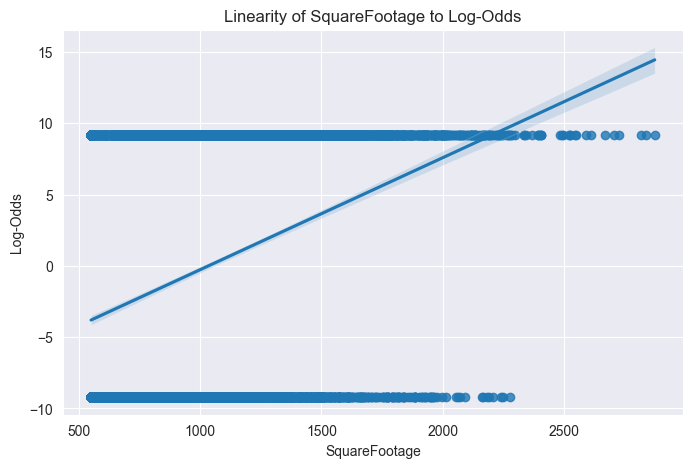

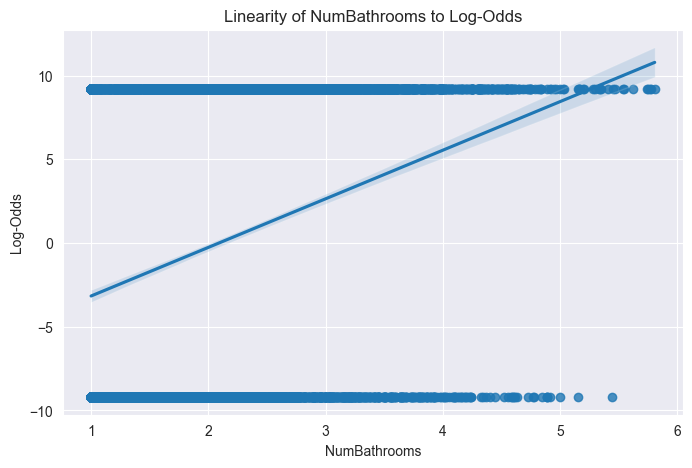

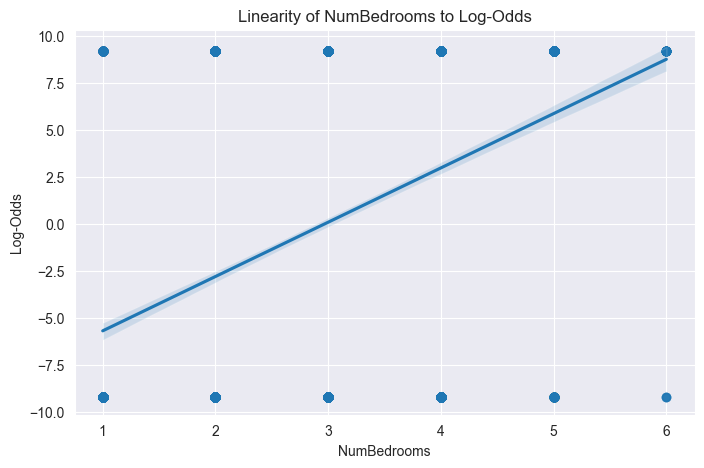

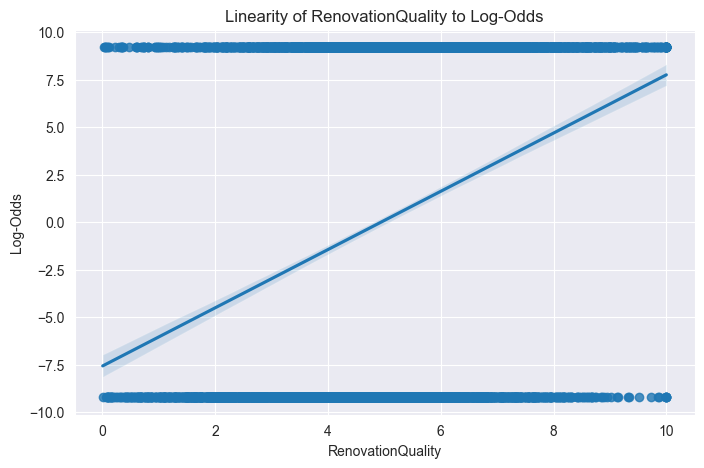

In [79]:
# Plot the relationship between each independent variable and the logit
df_selected_aligned = df_selected.loc[y_train.index]

# Loop through features and create regplots
for var in ['SquareFootage', 'NumBathrooms', 'NumBedrooms', 'RenovationQuality']:
    plt.figure(figsize=(8, 5))

    # Regplot with aligned data
    sns.regplot(x=df_selected_aligned[var],
                y=np.log((y_train + 0.0001) / (1 - y_train + 0.0001)))

    # Set plot titles and labels
    plt.title(f"Linearity of {var} to Log-Odds")
    plt.xlabel(var)
    plt.ylabel("Log-Odds")

    plt.show()